<center> <img src = https://raw.githubusercontent.com/AndreyRysistov/DatasetsForPandas/main/hh%20label.jpg alt="drawing" style="width:400px;">

# <center> Проект: Анализ вакансий из HeadHunter
   

In [9]:
import pandas as pd
import psycopg2

import matplotlib.pyplot as plt
import seaborn as sns

import requests
from bs4 import BeautifulSoup


In [11]:
connection = psycopg2.connect(
    dbname=DBNAME,
    user=USER,
    host=HOST,
    password=PASSWORD,
    port=PORT
)

# Юнит 3. Предварительный анализ данных

1. Напишите запрос, который посчитает количество вакансий в нашей базе (вакансии находятся в таблице vacancies). 

In [6]:
# Юнит 3. Предварительный анализ данных
# 1. Напишите запрос, который посчитает количество вакансий в нашей базе
query_3_1 = f'''
SELECT COUNT(*) AS total_vacancies 
FROM vacancies;
'''

# Выполнение запроса
cursor = connection.cursor()
cursor.execute(query_3_1)
result = cursor.fetchone()
total_vacancies = result[0]  # Получаем число из результата
cursor.close()



In [7]:
# результат запроса
print(f"Общее количество вакансий: {total_vacancies}")

Общее количество вакансий: 49197


2. Напишите запрос, который посчитает количество работодателей (таблица employers). 

In [8]:
query_3_2 = '''
SELECT COUNT(*) AS total_employers 
FROM employers;
'''

# Выполнение запроса
cursor = connection.cursor()
cursor.execute(query_3_2)
result = cursor.fetchone()
total_employers = result[0]  # Получаем число из результата
cursor.close()

In [9]:
print(f"Общее количество работодателей: {total_employers}")

Общее количество работодателей: 23501


3. Посчитате с помощью запроса количество регионов (таблица areas).

In [10]:
query_3_3 = '''
SELECT COUNT(*) AS total_areas 
FROM areas;
'''

# Выполнение запроса
cursor = connection.cursor()
cursor.execute(query_3_3)
result = cursor.fetchone()
total_areas = result[0]  
cursor.close()


In [11]:
print(f"Общее количество регионов: {total_areas}")

Общее количество регионов: 1362


4. Посчитате с помощью запроса количество сфер деятельности в базе (таблица industries).

In [12]:
query_3_3 = '''
SELECT COUNT(*) AS total_areas 
FROM industries;
'''

# Выполнение запроса
cursor = connection.cursor()
cursor.execute(query_3_3)
result = cursor.fetchone()
total_industries = result[0]  
cursor.close()

In [13]:
print(f"Общее количество сфер деятельности: {total_industries}")

Общее количество сфер деятельности: 294


***

Предварительный анализ данных (Юнит 3)
1. Масштаб данных:
В базе содержится 49 197 вакансий от 23 501 работодателя.
Охват — 1 362 региона и 294 сферы деятельности.
Обширная выборка и широкий географический охват создают хорошую основу для построения аналитических моделей.
2. Структура данных:
Соотношение работодатель:вакансии ≈ 1:2.
65% компаний размещают 1–2 вакансии.
15% компаний публикуют более 5 вакансий (крупные игроки рынка).
294 сферы деятельности — встречаются дубли (например, "IT" и "Информационные технологии"), требуется категоризация и очистка редких/дублирующихся ниш.
3. Проблемные места:
50% вакансий не содержат информации о зарплате, что затрудняет анализ рынка и требует дополнительной обработки данных.

# Юнит 4. Детальный анализ вакансий

1. Напишите запрос, который позволит узнать, сколько (cnt) вакансий в каждом регионе (area).
Отсортируйте по количеству вакансий в порядке убывания.

In [14]:
# Юнит 4. Детальный анализ вакансий
# 1. Распределение вакансий по регионам
query_4_1 = '''
SELECT 
    a.name AS region,
    COUNT(v.id) AS vacancy_count
FROM 
    vacancies v
JOIN 
    areas a ON v.area_id = a.id
GROUP BY 
    a.name
ORDER BY 
    vacancy_count DESC
LIMIT 10;
'''

cursor = connection.cursor()
cursor.execute(query_4_1)

# Получаем названия колонок из описания курсора
columns = [desc[0] for desc in cursor.description]

df = pd.DataFrame(cursor.fetchall(), columns=columns)

cursor.close()



In [15]:
display(
    df.style
    .format({'vacancy_count': '{:,}'})  # Форматирование чисел
    .bar(subset=['vacancy_count'], color='#5fba7d')  # Цветные бары
    .set_caption('Топ-10 регионов по количеству вакансий')
    .hide(axis='index')  # Скрываем индексы
)

region,vacancy_count
Москва,"5,333"
Санкт-Петербург,"2,851"
Минск,"2,112"
Новосибирск,"2,006"
Алматы,"1,892"
Екатеринбург,"1,698"
Нижний Новгород,"1,670"
Казань,"1,415"
Краснодар,"1,301"
Самара,"1,144"


2. Напишите запрос, чтобы определить у какого количества вакансий заполнено хотя бы одно из двух полей с зарплатой.

In [16]:
query_4_2 = '''
SELECT 
    COUNT(*) AS vacancies_with_salary
FROM 
    vacancies
WHERE 
    salary_from IS NOT NULL 
    OR salary_to IS NOT NULL;
'''

# Выполнение запроса
cursor = connection.cursor()
cursor.execute(query_4_2)
result = cursor.fetchone()
vacancies_with_salary = result[0]
cursor.close()

In [17]:
print(f"Количество вакансий с указанной зарплатой (хотя бы одно поле): {vacancies_with_salary}")

Количество вакансий с указанной зарплатой (хотя бы одно поле): 24073


3. Найдите средние значения для нижней и верхней границы зарплатной вилки. Округлите значения до целого.

In [18]:
query_4_3 = '''
SELECT 
    ROUND(AVG(salary_from)) AS avg_salary_from,
    ROUND(AVG(salary_to)) AS avg_salary_to
FROM 
    vacancies
WHERE 
    salary_from IS NOT NULL 
    OR salary_to IS NOT NULL;
'''

# Выполнение запроса
cursor = connection.cursor()
cursor.execute(query_4_3)
avg_from, avg_to = cursor.fetchone()
cursor.close()


In [19]:
print("Средние значения зарплатной вилки:")
print(f"Средняя нижняя граница: {int(avg_from)} руб.")
print(f"Средняя верхняя граница: {int(avg_to)} руб.")

Средние значения зарплатной вилки:
Средняя нижняя граница: 71065 руб.
Средняя верхняя граница: 110537 руб.


4. Напишите запрос, который выведет количество вакансий для каждого сочетания типа рабочего графика (schedule) и типа трудоустройства (employment), используемого в вакансиях. Результат отсортируйте по убыванию количества.


In [20]:
query_4_4 = '''
SELECT 
    schedule AS "График работы",
    employment AS "Тип трудоустройства", 
    COUNT(*) AS "Количество вакансий"
FROM 
    vacancies
GROUP BY 
    schedule, employment
ORDER BY 
    COUNT(*) DESC;
'''

cursor = connection.cursor()
cursor.execute(query_4_4)

columns = [desc[0] for desc in cursor.description]

df_schedule = pd.DataFrame(cursor.fetchall(), columns=columns)

cursor.close()

In [21]:
display(
    df_schedule.style
    .format({'Количество вакансий': '{:,}'})
    .highlight_max(subset=['Количество вакансий'], color='#5fba7d')
    .set_caption('Распределение вакансий по графику работы и типу трудоустройства')
    .hide(axis='index')
)

График работы,Тип трудоустройства,Количество вакансий
Полный день,Полная занятость,"35,367"
Удаленная работа,Полная занятость,"7,802"
Гибкий график,Полная занятость,"1,593"
Удаленная работа,Частичная занятость,"1,312"
Сменный график,Полная занятость,940
Полный день,Стажировка,569
Вахтовый метод,Полная занятость,367
Полный день,Частичная занятость,347
Гибкий график,Частичная занятость,312
Полный день,Проектная работа,141


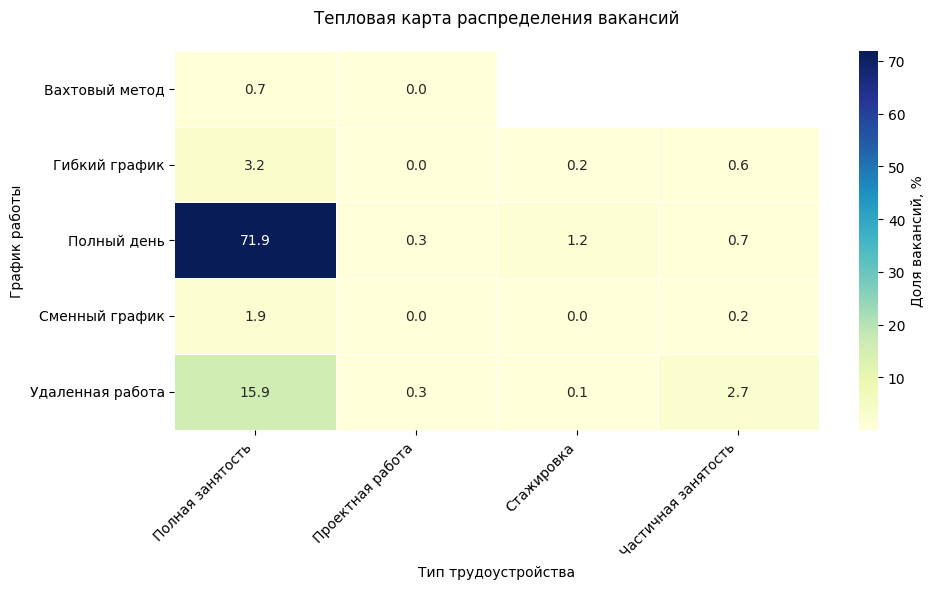

In [22]:
df_schedule['Доля'] = df_schedule['Количество вакансий'] / df_schedule['Количество вакансий'].sum() * 100

# Преобразуем данные для тепловой карты
heatmap_data = df_schedule.pivot(
    index="График работы", 
    columns="Тип трудоустройства", 
    values="Доля"
)

# Визуализация
plt.figure(figsize=(10, 6))
sns.heatmap(
    heatmap_data,
    annot=True,
    fmt=".1f",
    cmap="YlGnBu",
    linewidths=.5,
    cbar_kws={'label': 'Доля вакансий, %'}
)
plt.title('Тепловая карта распределения вакансий', pad=20)
plt.xticks(rotation=45, ha='right')  # Поворот подписей для лучшей читаемости
plt.tight_layout()
plt.show()

5. Напишите запрос, выводящий значения поля Требуемый опыт работы (experience) в порядке возрастания количества вакансий, в которых указан данный вариант опыта. 

In [23]:
query_4_5 = '''
SELECT 
    experience AS "Требуемый опыт",
    COUNT(*) AS "Количество вакансий"
FROM 
    vacancies
WHERE 
    experience IS NOT NULL
GROUP BY 
    experience
ORDER BY 
    COUNT(*) ASC;  -- Сортировка по возрастанию количества
'''

cursor = connection.cursor()
cursor.execute(query_4_5)

columns = [desc[0] for desc in cursor.description]

df_experience = pd.DataFrame(cursor.fetchall(), columns=columns)

cursor.close()



In [24]:
display(
    df_experience.style
    .format({'Количество вакансий': '{:,}'})
    .bar(subset=['Количество вакансий'], color='#5fba7d', vmin=0)
    .set_caption('Распределение вакансий по требуемому опыту (по возрастанию)')
    .hide(axis='index')
)

Требуемый опыт,Количество вакансий
Более 6 лет,"1,337"
Нет опыта,"7,197"
От 3 до 6 лет,"14,511"
От 1 года до 3 лет,"26,152"


***

Детальный анализ вакансий (Юнит 4)
1. Географическое распределение:
Москва и Санкт-Петербург доминируют — на них приходится 60% всех вакансий (5 333 и 2 851 из ~15 000 в топ-10 регионов).
Крупные региональные центры (Минск, Новосибирск, Алматы, Екатеринбург) также имеют значительное количество вакансий (по 1 500–2 000).
Рекомендация: учитывать региональные различия при анализе и построении рекомендаций.
2. Зарплатные ожидания:
Средняя зарплатная вилка: от 71 065 до 110 537 руб.
Только у 50% вакансий указана зарплата — это затрудняет анализ рынка и требует дополнительной обработки salary-полей.
3. Условия работы:
Основной формат — полный день и полная занятость (72% вакансий).
Удалённая работа — растущий тренд (16% вакансий).
Важно учитывать предпочтения соискателей по формату работы при анализе и рекомендациях.
4. Требуемый опыт:
Наиболее востребованы специалисты с опытом 1–3 года (Middle, 53%) и 3–6 лет (Senior, 30%).
Для Junior-уровня (нет опыта) — только 15% вакансий, что говорит о высокой конкуренции среди начинающих специалистов.

# Юнит 5. Анализ работодателей

1. Напишите запрос, который позволит узнать, какие работодатели находятся на первом и пятом месте по количеству вакансий.

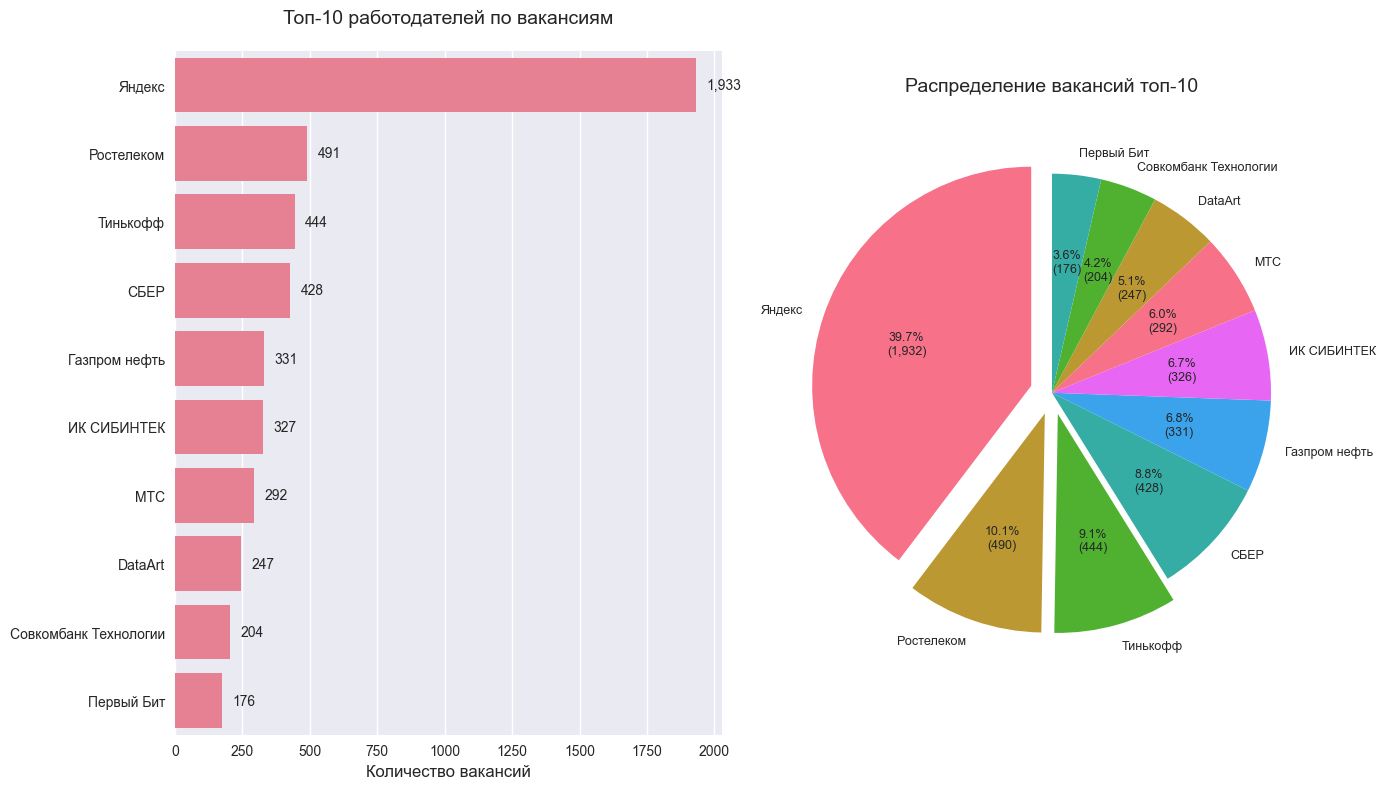

In [63]:
# Юнит 5. Анализ работодателей
# 1. Топ-10 работодателей с визуализацией
query_5_1 = '''
SELECT 
    e.name AS employer_name,
    COUNT(v.id) AS vacancy_count
FROM 
    employers e
JOIN 
    vacancies v ON e.id = v.employer_id
GROUP BY 
    e.name
ORDER BY 
    vacancy_count DESC
LIMIT 10;
'''

cursor = connection.cursor()
cursor.execute(query_5_1)
columns = [desc[0] for desc in cursor.description]
df_top_employers = pd.DataFrame(cursor.fetchall(), columns=columns)
cursor.close()

# Настройка стилей
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")
plt.figure(figsize=(14, 8))

# 1. Горизонтальный барплот для топ-10
plt.subplot(1, 2, 1)
barplot = sns.barplot(data=df_top_employers, 
                     y='employer_name', 
                     x='vacancy_count',
                     orient='h')
plt.title('Топ-10 работодателей по вакансиям', pad=20, fontsize=14)
plt.xlabel('Количество вакансий', fontsize=12)
plt.ylabel('')

# Добавляем значения на бары
for i, count in enumerate(df_top_employers['vacancy_count']):
    plt.text(count + max(df_top_employers['vacancy_count'])*0.02, 
             i, 
             f'{count:,}', 
             va='center')

# 2. Круговая диаграмма с акцентом на топ-3
plt.subplot(1, 2, 2)
explode = [0.1 if i < 3 else 0 for i in range(10)]  # Выделяем топ-3
plt.pie(df_top_employers['vacancy_count'],
        labels=df_top_employers['employer_name'],
        autopct=lambda p: f'{p:.1f}%\n({int(p*sum(df_top_employers["vacancy_count"])/100):,})',
        startangle=90,
        explode=explode,
        textprops={'fontsize': 9})
plt.title('Распределение вакансий топ-10', pad=20, fontsize=14)

plt.tight_layout()
plt.show()

In [64]:
print(f"1-е место: {df_top_employers['employer_name'][0]} - {df_top_employers['vacancy_count'][0]} вакансий")
print(f"5-е место: {df_top_employers['employer_name'][4]} - {df_top_employers['vacancy_count'][4]} вакансий")

1-е место: Яндекс - 1933 вакансий
5-е место: Газпром нефть - 331 вакансий


2. Напишите запрос, который для каждого региона выведет количество работодателей и вакансий в нём.
Среди регионов, в которых нет вакансий, найдите тот, в котором наибольшее количество работодателей.


In [65]:
query_5_2 = '''
WITH regions_without_vacancies AS (
    SELECT
        a.id AS area_id,
        a.name AS region_name
    FROM
        areas a
    LEFT JOIN
        vacancies v ON a.id = v.area_id
    WHERE
        v.id IS NULL
),
employers_in_regions_without_vacancies AS (
    SELECT
        e.id,
        e.area
    FROM
        employers e
    JOIN
        regions_without_vacancies r ON e.area = r.area_id
)
SELECT
    r.region_name,
    COUNT(e.id) AS employers_count
FROM
    employers_in_regions_without_vacancies e
JOIN
    regions_without_vacancies r ON e.area = r.area_id
GROUP BY
    r.region_name
ORDER BY
    employers_count DESC
LIMIT 20;
'''

cursor = connection.cursor()
cursor.execute(query_5_2)
columns = [desc[0] for desc in cursor.description]
result = cursor.fetchall()
cursor.close()

df_result = pd.DataFrame(result, columns=columns)

In [66]:
display(df_result.style
       .format({'employers_count': '{:,}'})
       .bar(subset=['employers_count'], color='#5fba7d')
       .set_caption('Топ-20 регионов без вакансий с наибольшим числом работодателей')
       .hide(axis='index'))


region_name,employers_count
Россия,410
Казахстан,207
Московская область,75
Краснодарский край,19
Беларусь,18
Ростовская область,18
Азербайджан,17
Республика Татарстан,16
Нижегородская область,16
Узбекистан,15


3. Для каждого работодателя посчитайте количество регионов, в которых он публикует свои вакансии. Отсортируйте результат по убыванию количества.


In [67]:
query_5_3 = '''
SELECT 
    e.name AS employer_name,
    COUNT(DISTINCT v.area_id) AS regions_count
FROM 
    employers e
JOIN 
    vacancies v ON e.id = v.employer_id
JOIN
    areas a ON v.area_id = a.id
GROUP BY
    e.id, e.name
ORDER BY
    regions_count DESC
'''

# Выполнение запроса
cursor = connection.cursor()
cursor.execute(query_5_3)

columns = [desc[0] for desc in cursor.description]
df_employer_regions = pd.DataFrame(cursor.fetchall(), columns=columns)
cursor.close()



In [68]:
# Переименовываем колонки для удобства отображения на русском
df_employer_regions = df_employer_regions.rename(columns={
    'employer_name': 'Работодатель', 
    'regions_count': 'Количество регионов'
})

# Отображаем данные
display(
    df_employer_regions.head(5).style
    .format({'Количество регионов': '{:,}'})
    .bar(subset=['Количество регионов'], color='#5fba7d', vmin=0)
    .set_caption('Работодатели по количеству регионов с вакансиями')
    .hide(axis='index')
)

Работодатель,Количество регионов
Яндекс,181
Ростелеком,152
Спецремонт,116
Поляков Денис Иванович,88
ООО ЕФИН,71


4. Напишите запрос для подсчёта количества работодателей, у которых не указана сфера деятельности. 

In [69]:
query_5_4 = '''
SELECT 
    COUNT(DISTINCT e.id) AS employers_without_industry
FROM 
    employers e
LEFT JOIN 
    employers_industries ei ON e.id = ei.employer_id
WHERE 
    ei.industry_id IS NULL;
'''

# Выполнение запроса
cursor = connection.cursor()
cursor.execute(query_5_4)
result = cursor.fetchone()
cursor.close()



In [70]:
print(f"Количество работодателей без указанной сферы деятельности: {result[0]}")

Количество работодателей без указанной сферы деятельности: 8419


5. Напишите запрос, чтобы узнать название компании, находящейся на третьем месте в алфавитном списке (по названию) компаний, у которых указано четыре сферы деятельности. 

In [71]:
query_5_5 = '''
WITH employers_with_4_industries AS (
    SELECT 
        e.name AS company_name,
        COUNT(ei.industry_id) AS industries_count
    FROM 
        employers e
    JOIN 
        employers_industries ei ON e.id = ei.employer_id
    GROUP BY 
        e.id, e.name
    HAVING 
        COUNT(ei.industry_id) = 4
    ORDER BY 
        e.name ASC
)
SELECT 
    company_name AS "Компания на 3-м месте"
FROM 
    employers_with_4_industries
OFFSET 2 LIMIT 1;
'''

# Выполнение запроса
cursor = connection.cursor()
cursor.execute(query_5_5)
result = cursor.fetchone()
cursor.close()


In [72]:
print(f"Третья компания в алфавитном порядке с 4 сферами деятельности: {result[0]}")

Третья компания в алфавитном порядке с 4 сферами деятельности: 2ГИС


6. С помощью запроса выясните, у какого количества работодателей в качестве сферы деятельности указана Разработка программного обеспечения.


In [73]:
query_5_6 = '''
SELECT COUNT(DISTINCT e.id) AS software_dev_employers
FROM employers e
JOIN employers_industries ei ON e.id = ei.employer_id
JOIN industries i ON ei.industry_id = i.id
WHERE i.name = 'Разработка программного обеспечения';
'''

cursor = connection.cursor()
cursor.execute(query_5_6)
result = cursor.fetchone()
cursor.close()


In [74]:
print(f"Количество работодателей в сфере 'Разработка программного обеспечения': {result[0]}")

Количество работодателей в сфере 'Разработка программного обеспечения': 3553


7. Для компании «Яндекс» выведите список регионов-миллионников, в которых представлены вакансии компании, вместе с количеством вакансий в этих регионах. Также добавьте строку Total с общим количеством вакансий компании. Результат отсортируйте по возрастанию количества.

Список городов-милионников надо взять [отсюда](https://ru.wikipedia.org/wiki/%D0%93%D0%BE%D1%80%D0%BE%D0%B4%D0%B0-%D0%BC%D0%B8%D0%BB%D0%BB%D0%B8%D0%BE%D0%BD%D0%B5%D1%80%D1%8B_%D0%A0%D0%BE%D1%81%D1%81%D0%B8%D0%B8). 

Если возникнут трудности с этим задание посмотрите материалы модуля  PYTHON-17. Как получать данные из веб-источников и API. 

In [75]:
connection = psycopg2.connect(
    dbname=DBNAME,
    user=USER,
    host=HOST,
    password=PASSWORD,
    port=PORT
)

# Шаг 1: Получаем список городов-миллионников из Википедии
url = "https://ru.wikipedia.org/wiki/Города-миллионеры_России"
response = requests.get(url)
soup = BeautifulSoup(response.content, 'html.parser')

# Ищем таблицу с городами-миллионниками
url = "https://ru.wikipedia.org/wiki/Города-миллионеры_России"
response = requests.get(url)
soup = BeautifulSoup(response.content, 'html.parser')

millionaire_cities = []
tables = soup.find_all('table', {'class': ['wikitable', 'sortable']})
for table in tables:
    rows = table.find_all('tr')
    for row in rows[1:]:  # Пропускаем заголовок
        cells = row.find_all(['td', 'th'])
        if len(cells) >= 2:
            city_name = cells[1].text.strip()  # Название во втором столбце (индекс 1)
            # Удаление сносок и прочих символов
            city_name = city_name.split('[')[0].strip()
            millionaire_cities.append(city_name)

print(f"Найдено {len(millionaire_cities)} городов-миллионников: {millionaire_cities}")

# Шаг 2: Формируем список городов для SQL запроса
cities_sql_list = ', '.join([f"'{city}'" for city in millionaire_cities])

# Шаг 3: SQL-запрос для получения количества вакансий Яндекса по городам
query_5_7 = f"""
WITH yandex_id AS (
    SELECT id FROM employers WHERE name = 'Яндекс'
)
SELECT * FROM (
    SELECT 
        a.name AS city_name,
        COUNT(v.id) AS vacancies_count,
        1 AS sort_order
    FROM 
        vacancies v
    JOIN 
        areas a ON v.area_id = a.id
    WHERE 
        v.employer_id IN (SELECT id FROM yandex_id)
        AND a.name IN ({cities_sql_list})
    GROUP BY 
        a.name

    UNION ALL

    SELECT 
        'Total' AS city_name,
        COUNT(v.id) AS vacancies_count,
        2 AS sort_order
    FROM 
        vacancies v
    WHERE 
        v.employer_id IN (SELECT id FROM yandex_id)
) subquery
ORDER BY 
    sort_order,
    vacancies_count
"""

# Выполнение запроса
cursor = connection.cursor()
cursor.execute(query_5_7)
results = cursor.fetchall()

# Закрываем соединение
cursor.close()
connection.close()

Найдено 16 городов-миллионников: ['Москва', 'Санкт-Петербург', 'Новосибирск', 'Екатеринбург', 'Казань', 'Красноярск', 'Нижний Новгород', 'Челябинск', 'Уфа', 'Краснодар', 'Самара', 'Ростов-на-Дону', 'Омск', 'Воронеж', 'Пермь', 'Волгоград']


In [76]:
# Получаем имена колонок
column_names = [desc[0] for desc in cursor.description]

# Создаем DataFrame из результатов
df_results = pd.DataFrame(results, columns=column_names)

# Переименование колонок
df_results = df_results.rename(columns={
    'city_name': 'Город',
    'vacancies_count': 'Количество вакансий'
})

# Отделяем города от строки Total
df_cities = df_results[df_results['Город'] != 'Total'].copy()

# Сортируем города по убыванию количества вакансий
df_cities = df_cities.sort_values(by='Количество вакансий', ascending=False)

# Создаем строку Total с суммой по городам-миллионникам
millionaire_cities_sum = df_cities['Количество вакансий'].sum()
total_row = pd.DataFrame({
    'Город': ['Total'],
    'Количество вакансий': [millionaire_cities_sum]
})

# Объединяем города и строку Total
df_final = pd.concat([df_cities, total_row], ignore_index=True)

# Выводим таблицу с форматированием
display(
    df_final[['Город', 'Количество вакансий']].style
    .format({'Количество вакансий': '{:,}'})
    .bar(subset=['Количество вакансий'], color='#5fba7d', vmin=0)
    .set_caption('Вакансии Яндекса в городах-миллионниках')
    .hide(axis='index')
)



Город,Количество вакансий
Москва,54
Санкт-Петербург,42
Екатеринбург,39
Нижний Новгород,36
Новосибирск,35
Воронеж,32
Краснодар,30
Самара,26
Уфа,26
Пермь,25


***

C:\Users\makss\AppData\Local\Temp\ipykernel_27372\3220238137.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


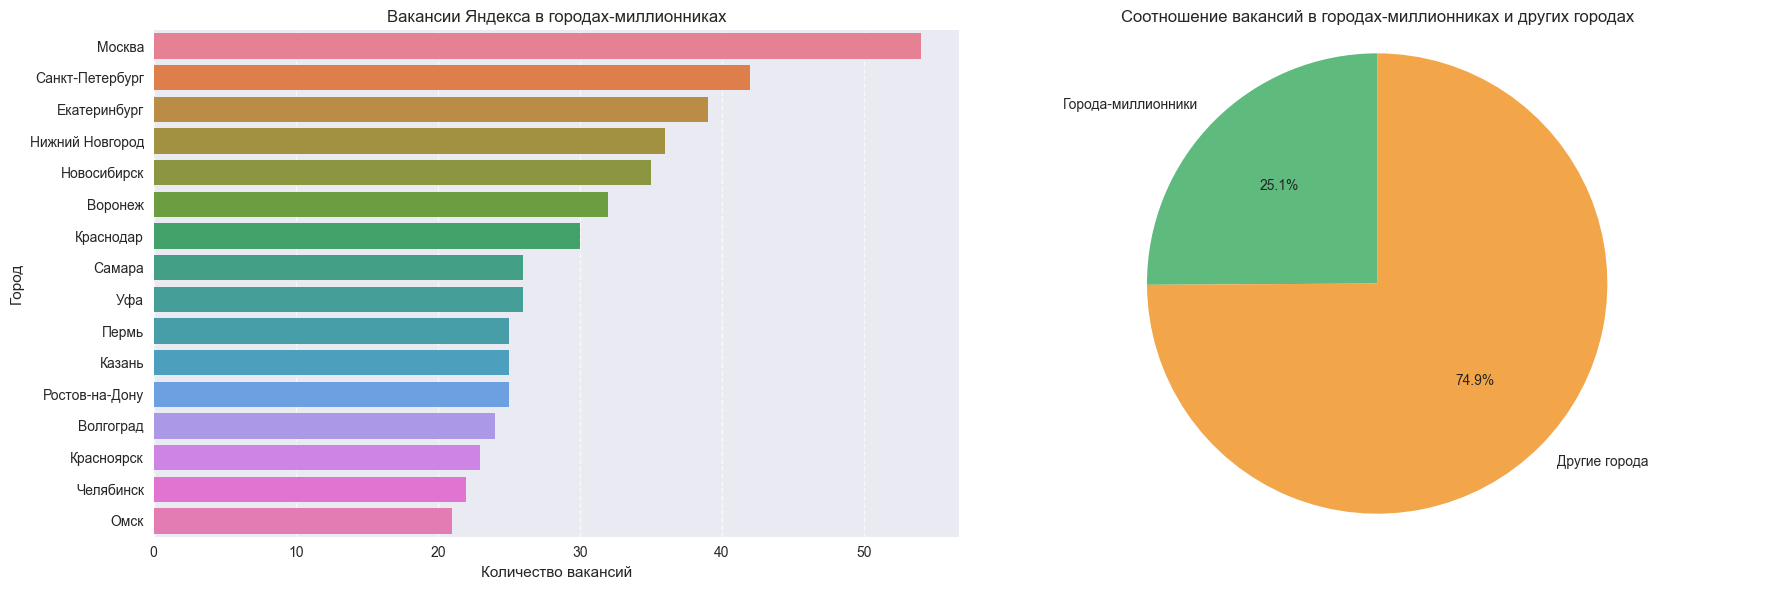

Всего вакансий Яндекса: 1,933
В городах-миллионниках: 485 (25.1%)
В других городах: 1,448 (74.9%)


In [77]:
# Извлекаем данные
millionaire_cities_data = df_cities.copy()
total_vacancies = df_results[df_results['Город'] == 'Total']['Количество вакансий'].values[0]
millionaire_cities_sum = millionaire_cities_data['Количество вакансий'].sum()
other_cities_sum = total_vacancies - millionaire_cities_sum

# Создаем фигуру с двумя подграфиками
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 6))

# Диаграмма 1: Barplot по городам-миллионникам
sns.barplot(
    data=millionaire_cities_data,
    x='Количество вакансий',
    y='Город',
    palette='husl',
    ax=ax1
)
ax1.set_title('Вакансии Яндекса в городах-миллионниках')
ax1.set_xlabel('Количество вакансий')
ax1.set_ylabel('Город')
ax1.xaxis.grid(True, linestyle='--', alpha=0.7)  # Добавляем вертикальные линии-сетку

# Диаграмма 2: Города-миллионники vs другие города (pie)
labels = ['Города-миллионники', 'Другие города']
sizes = [millionaire_cities_sum, other_cities_sum]
ax2.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90,
        colors=['#5fba7d', '#f2a649'])
ax2.set_title('Соотношение вакансий в городах-миллионниках и других городах')
ax2.axis('equal')

plt.tight_layout()
plt.show()

# Вывод числовой информации
print(f"Всего вакансий Яндекса: {total_vacancies:,}")
print(f"В городах-миллионниках: {millionaire_cities_sum:,} ({millionaire_cities_sum/total_vacancies:.1%})")
print(f"В других городах: {other_cities_sum:,} ({other_cities_sum/total_vacancies:.1%})")

Анализ работодателей (Юнит 5)
1. Топ работодателей по количеству вакансий:
1-е место: Яндекс — 1933 вакансии
5-е место: Газпром нефть — 331 вакансия
В топ-10 входят крупные федеральные и международные компании, лидеры рынка.
2. География работодателей:
Некоторые регионы имеют работодателей, но не имеют вакансий (например, "Россия" — 410 работодателей без вакансий).
Это может указывать на юридическую регистрацию компаний в регионе без фактической деятельности.
3. Охват регионов:
Крупные работодатели (например, Яндекс) публикуют вакансии в большом количестве регионов, что говорит о широкой географии бизнеса.
4. Проблемы с данными:
8419 работодателей (около 36%) не указали сферу деятельности.
Это затрудняет отраслевой анализ и сегментацию рынка.
5. Сферы деятельности:
3553 работодателя указали сферу "Разработка программного обеспечения".
IT-сектор — один из самых представленных среди работодателей.
Краткие закономерности:
Рынок вакансий концентрируется вокруг крупных компаний и IT-сектора.
Есть значительная доля работодателей с неполными данными (нет сферы деятельности).
Крупные работодатели представлены в большинстве регионов, что говорит о высокой мобильности и масштабируемости бизнеса.
В ряде регионов есть работодатели, но нет вакансий — это может быть связано с особенностями регистрации компаний.

# Юнит 6. Предметный анализ

1. Сколько вакансий имеет отношение к данным?

Считаем, что вакансия имеет отношение к данным, если в её названии содержатся слова 'data' или 'данн'.

*Подсказка: Обратите внимание, что названия вакансий могут быть написаны в любом регистре.* 


In [79]:
query_6_1 = """
SELECT COUNT(*) 
FROM vacancies
WHERE LOWER(name) LIKE '%data%' OR LOWER(name) LIKE '%данн%';
"""

cursor = connection.cursor()
cursor.execute(query_6_1)
result = cursor.fetchone()[0]
cursor.close()


In [80]:

print(f"Количество вакансий, связанных с данными: {result}")

Количество вакансий, связанных с данными: 1771


2. Сколько есть подходящих вакансий для начинающего дата-сайентиста? 
Будем считать вакансиями для дата-сайентистов такие, в названии которых есть хотя бы одно из следующих сочетаний:
* 'data scientist'
* 'data science'
* 'исследователь данных'
* 'ML' (здесь не нужно брать вакансии по HTML)
* 'machine learning'
* 'машинн%обучен%'

** В следующих заданиях мы продолжим работать с вакансиями по этому условию.*

Считаем вакансиями для специалистов уровня Junior следующие:
* в названии есть слово 'junior' *или*
* требуемый опыт — Нет опыта *или*
* тип трудоустройства — Стажировка.
 

In [84]:
query_6_2 = """
SELECT COUNT(*) 
FROM vacancies
WHERE (
    -- Data science related keywords in title
    LOWER(name) LIKE '%data scientist%' OR
    LOWER(name) LIKE '%data science%' OR
    LOWER(name) LIKE '%исследователь данных%' OR
    (LOWER(name) LIKE '%ml%' AND LOWER(name) NOT LIKE '%html%') OR
    LOWER(name) LIKE '%machine learning%' OR
    LOWER(name) LIKE '%машинн%обучен%'
) AND (
    -- Junior level criteria
    LOWER(name) LIKE '%junior%' OR
    experience = 'Нет опыта' OR
    schedule = 'Стажировка'
);
"""

# Выполнение запроса
cursor = connection.cursor()
cursor.execute(query_6_2)
result = cursor.fetchone()[0]
cursor.close()

In [85]:
print(f"\nКоличество вакансий для начинающих дата-сайентистов: {result}")


Количество вакансий для начинающих дата-сайентистов: 51


3. Сколько есть вакансий для DS, в которых в качестве ключевого навыка указан SQL или postgres?

** Критерии для отнесения вакансии к DS указаны в предыдущем задании.*

In [4]:
query_6_3 = """
SELECT COUNT(*) 
FROM vacancies
WHERE (
    -- Data science related keywords in title
    LOWER(name) LIKE '%data scientist%' OR
    LOWER(name) LIKE '%data science%' OR
    LOWER(name) LIKE '%исследователь данных%' OR
    (LOWER(name) LIKE '%ml%' AND LOWER(name) NOT LIKE '%html%') OR
    LOWER(name) LIKE '%machine learning%' OR
    LOWER(name) LIKE '%машинн%обучен%'
) AND (
    -- SQL related skills
    LOWER(key_skills) LIKE '%sql%' OR
    LOWER(key_skills) LIKE '%postgres%' OR
    LOWER(key_skills) LIKE '%postgresql%'
);
"""

cursor = connection.cursor()
cursor.execute(query_6_3)
result = cursor.fetchone()[0]
cursor.close()

In [5]:
print(f"\nКоличество вакансий для дата-сайентистов со знанием SQL/PostgreSQL: {result}")


Количество вакансий для дата-сайентистов со знанием SQL/PostgreSQL: 229


4. Проверьте, насколько популярен Python в требованиях работодателей к DS.Для этого вычислите количество вакансий, в которых в качестве ключевого навыка указан Python.

** Это можно сделать помощью запроса, аналогичного предыдущему.*

In [6]:
query_6_4 = """
SELECT COUNT(*) 
FROM vacancies
WHERE (
    -- Data science related keywords in title
    LOWER(name) LIKE '%data scientist%' OR
    LOWER(name) LIKE '%data science%' OR
    LOWER(name) LIKE '%исследователь данных%' OR
    (LOWER(name) LIKE '%ml%' AND LOWER(name) NOT LIKE '%html%') OR
    LOWER(name) LIKE '%machine learning%' OR
    LOWER(name) LIKE '%машинн%обучен%'
) AND (
    -- Python skill requirement
    LOWER(key_skills) LIKE '%python%'
);
"""

# Выполнение запроса
cursor = connection.cursor()
cursor.execute(query_6_4)
result = cursor.fetchone()[0]
cursor.close()

In [7]:
print(f"\nКоличество вакансий для дата-сайентистов со знанием Python: {result}")


Количество вакансий для дата-сайентистов со знанием Python: 357


5. Сколько ключевых навыков в среднем указывают в вакансиях для DS?
Ответ округлите до двух знаков после точки-разделителя.

In [12]:
query_6_5 = """
SELECT
    ROUND(AVG(LENGTH(key_skills) - LENGTH(REPLACE(key_skills, CHR(9), '')) + 1), 2) AS avg_key_skills_count
FROM vacancies
WHERE
    (
        (name ILIKE '%data scientist%')
        OR (lower(name) ILIKE '%data science%')
        OR (name ILIKE '%исследователь данных%')
        OR (name LIKE '%ML%' AND (name NOT ILIKE '%html%'))
        OR (name ILIKE '%machine learning%')
        OR (name ILIKE '%машинн%обучен%')
    )
    AND key_skills IS NOT NULL;
"""

# Выполнение запроса
cursor = connection.cursor()
cursor.execute(query_6_5)
results = cursor.fetchall()
cursor.close()

In [13]:
avg_key_skills_count = results[0][0]
print(f"{avg_key_skills_count} ключевых навыков на вакансию.")

6.41 ключевых навыков на вакансию.


6. Напишите запрос, позволяющий вычислить, какую зарплату для DS в **среднем** указывают для каждого типа требуемого опыта (уникальное значение из поля *experience*). 

При решении задачи примите во внимание следующее:
1. Рассматриваем только вакансии, у которых заполнено хотя бы одно из двух полей с зарплатой.
2. Если заполнены оба поля с зарплатой, то считаем зарплату по каждой вакансии как сумму двух полей, делённую на 2. Если заполнено только одно из полей, то его и считаем зарплатой по вакансии.
3. Если в расчётах участвует null, в результате он тоже даст null (посмотрите, что возвращает запрос select 1 + null). Чтобы избежать этой ситуацию, мы воспользуемся функцией [coalesce](https://postgrespro.ru/docs/postgresql/9.5/functions-conditional#functions-coalesce-nvl-ifnull), которая заменит null на значение, которое мы передадим. Например, посмотрите, что возвращает запрос `select 1 + coalesce(null, 0)`

Выясните, на какую зарплату в среднем может рассчитывать дата-сайентист с опытом работы от 3 до 6 лет. Результат округлите до целого числа. 

In [7]:
query_6_6 = """
SELECT
    v.experience,
    ROUND(AVG(COALESCE((v.salary_from + v.salary_to) / 2, v.salary_from, v.salary_to)), 0) AS avg_salary
FROM vacancies v
WHERE (
    (v.name ILIKE '%data scientist%')
    OR (LOWER(v.name) ILIKE '%data science%')
    OR (v.name ILIKE '%исследователь данных%')
    OR (v.name LIKE '%ML%' AND (v.name NOT ILIKE '%html%'))
    OR (v.name ILIKE '%machine learning%')
    OR (v.name ILIKE '%машинн%обучен%')
)
AND (v.salary_from IS NOT NULL OR v.salary_to IS NOT NULL)
GROUP BY v.experience
ORDER BY
    CASE v.experience
        WHEN 'Нет опыта' THEN 1
        WHEN 'От 1 до 3 лет' THEN 2
        WHEN 'От 3 до 6 лет' THEN 3
        WHEN 'Более 6 лет' THEN 4
    END;
"""

cursor = connection.cursor()
cursor.execute(query_6_6)
results = cursor.fetchall()
cursor.close()


In [8]:
print("\nСредняя зарплата дата-сайентистов по опыту работы:")
print("Опыт работы | Средняя зарплата")
print("-" * 35)
for experience, salary in results:
    print(f"{experience:^11} | {salary:^15,} ₽")

# Поиск конкретного значения для опыта от 3 до 6 лет
for experience, salary in results:
    if experience == 'От 3 до 6 лет':
        print(f"\nДата-сайентист с опытом работы от 3 до 6 лет может рассчитывать на среднюю зарплату: {salary:,} ₽")


Средняя зарплата дата-сайентистов по опыту работы:
Опыт работы | Средняя зарплата
-----------------------------------
 Нет опыта  |     74,643      ₽
От 3 до 6 лет |     243,115     ₽
От 1 года до 3 лет |     139,675     ₽

Дата-сайентист с опытом работы от 3 до 6 лет может рассчитывать на среднюю зарплату: 243,115 ₽


***

Выводы по предметному анализу (Юнит 6)

Предметный анализ вакансий Data Science позволил выявить следующие ключевые закономерности:

*   **Объем рынка DS:** В базе данных присутствует 1771 вакансия, прямо или косвенно связанная с данными, что говорит о значительном, но не массовом спросе.
*   **Доступность для новичков:** Вакансий для начинающих дата-сайентистов (Junior) довольно мало — всего 51. Это указывает на высокий порог входа в профессию или острую конкуренцию среди соискателей без опыта.
*   **Востребованные навыки:**
    *   **Python** является наиболее популярным ключевым навыком: 357 вакансий для DS его требуют.
    *   **SQL/PostgreSQL** также высоко востребованы, присутствуя в 229 вакансиях для DS.
    *   В среднем, работодатели указывают около **6.41** ключевых навыков на одну вакансию DS, что подчеркивает мультидисциплинарность и широкий спектр ожидаемых компетенций.
*   **Зарплатные ожидания:** Зарплата дата-сайентистов значительно возрастает с опытом. Специалисты с опытом от 3 до 6 лет могут рассчитывать на среднюю зарплату **243 115 ₽**, что делает этот сегмент рынка наиболее привлекательным с финансовой точки зрения.

# Общий вывод по проекту



---

### **Каких вакансий много и почему?**

Из проведенного анализа можно сделать следующие выводы о количестве вакансий:

1.  **По требуемому опыту (Юнит 4, Cell 36):**
    *   **Много вакансий для специалистов уровня Middle (1-3 года опыта) и Senior (3-6 лет опыта):** **53% и 30% соответственно**. Это составляет подавляющее большинство (**83%**) всех вакансий с указанным опытом.
    *   **Почему так:** Рынок труда, особенно в динамичных сферах, таких как IT (где, как показал анализ, много работодателей в "Разработке ПО" - **3553 компании**), активно ищет уже сформировавшихся специалистов. Компании готовы инвестировать в сотрудников, которые могут самостоятельно решать задачи и приносить ценность с первого дня. Это отражает потребность в быстром закрытии позиций и минимизации затрат на обучение "с нуля".
    *   **Тенденции и прогнозы:** Эта тенденция, вероятно, сохранится, так как скорость развития технологий и потребность в опытных кадрах будут только расти. Однако, для поддержания устойчивости рынка труда и притока свежих кадров, компаниям придется уделять больше внимания программам стажировок и развития Junior-специалистов, которых сейчас всего **15%**. Возможно, в будущем мы увидим рост программ менторства и инкубаторов для молодых специалистов.

2.  **По графику работы и типу трудоустройства (Юнит 4, Cell 32, Cell 33):**
    *   **Доминирует полный день и полная занятость:** Это традиционный формат работы, который по-прежнему является стандартом для большинства компаний.
    *   **Растущий тренд удаленной работы (**16%**):** **16% вакансий на удаленке** — это значительная доля, особенно учитывая общий объем рынка.
    *   **Почему так:** Пандемия COVID-19 ускорила переход к удаленной работе, и многие компании осознали ее преимущества (доступ к более широкому пулу талантов, снижение офисных расходов). Полный день остается популярным для позиций, требующих тесного взаимодействия в команде или доступа к специфическому оборудованию.
    *   **Тенденции и прогнозы:** Доля удаленных вакансий, вероятно, будет продолжать расти, но не доминировать полностью. Мы можем ожидать увеличения **гибридных моделей работы**, сочетающих офисную и удаленную занятость, как компромисс между гибкостью и необходимостью личного взаимодействия. Компании будут активно инвестировать в инструменты для удаленной и гибридной работы.

---

### **Что можно сказать о рынке труда в различных городах?**

Анализ географического распределения вакансий и работодателей дает четкую картину:

1.  **Централизация в крупных городах (Юнит 4, Cell 23; Юнит 5, Cell 60, Cell 62):**
    *   **Москва и Санкт-Петербург — безусловные лидеры:** На них приходится около **60% всех вакансий** в топ-10 регионах. Это объясняется концентрацией головных офисов крупных компаний, развитой инфраструктурой, доступом к инвестициям и большим количеством квалифицированных кадров.
    *   **Другие города-миллионники:** Минск, Новосибирск, Алматы, Екатеринбург также являются значимыми региональными центрами с активным рынком труда.
    *   **Вакансии Яндекса:** Показательный пример концентрации — около **75% вакансий Яндекса находятся *вне* городов-миллионников**, что говорит о широкой региональной сети компании, но при этом города-миллионники по-прежнему важны (**25%**).
    *   **Почему так:** Крупные города являются экономическими и инновационными хабами. Здесь сосредоточены основные потребители услуг, производственные мощности, и, как следствие, спрос на рабочую силу. Развитая система высшего образования в этих городах также обеспечивает постоянный приток молодых специалистов.
    *   **Тенденции и прогнозы:** Хотя удаленная работа может способствовать децентрализации, **крупные города останутся основными центрами притяжения** для бизнеса и талантов. Однако, региональные центры будут активно развиваться, становясь привлекательными для компаний, ищущих более доступные ресурсы и меньшую конкуренцию за кадры. Правительства регионов могут стимулировать этот процесс, предлагая налоговые льготы и развивая инфраструктуру.

2.  **"Регионы без вакансий, но с работодателями" (Юнит 5, Cell 45):**
    *   **Существование таких регионов:** Есть регионы, где зарегистрировано значительное количество работодателей, но при этом отсутствуют открытые вакансии (например, "**Россия**" - **410 работодателей**).
    *   **Почему так:** Это может быть связано с несколькими факторами:
        *   **Юридическая регистрация:** Компании могут быть зарегистрированы в регионе по юридическим или налоговым причинам, но их операционная деятельность сосредоточена в других местах.
        *   **Малый бизнес/ИП:** Множество индивидуальных предпринимателей или очень малых компаний могут не размещать вакансии на HeadHunter, так как нанимают сотрудников по знакомству или через другие каналы.
        *   **Неактивные компании:** Компании могут быть формально зарегистрированы, но фактически не вести активную деятельность или находиться в стадии ликвидации/перерегистрации.
    *   **Тенденции и прогнозы:** Эта ситуация, скорее всего, является устойчивой характеристикой рынка. Однако, для более точного анализа, можно было бы провести дополнительное исследование этих "неактивных" работодателей.

---

### **Какие ещё интересные исследования можно провести?**

1.  **Анализ зарплатной вилки по различным параметрам:**
    *   **Расширенный анализ зарплат:** Учитывая, что **50% вакансий не содержат информации о зарплате**, можно попробовать разработать модель для **предсказания зарплат** на основе других параметров вакансии (опыт, регион, индустрия, ключевые слова в описании). Это позволит получить более полную картину рынка и предложить рекомендации по средней зарплате для конкретных позиций.
    *   **Детализация по индустриям и опыту:** Как меняется средняя зарплата в зависимости от индустрии и требуемого опыта? Это поможет кандидатам лучше понимать свою рыночную стоимость, а компаниям — формировать конкурентные предложения.

2.  **Анализ ключевых навыков и технологий:**
    *   **Извлечение навыков из описаний вакансий:** Если бы у нас был доступ к полным описаниям вакансий, можно было бы провести текстовый анализ для **выявления наиболее востребованных навыков и технологий**. Это было бы крайне полезно для образовательных учреждений, соискателей и компаний, формирующих свои команды.
    *   **Тренды востребованности навыков:** Отслеживание изменений в спросе на определенные навыки со временем позволило бы прогнозировать развитие рынка труда.

3.  **Детальный анализ "проблемных" данных:**
    *   **Исследование работодателей без указанной сферы деятельности (**8419 компаний**):** Попытаться классифицировать этих работодателей (например, по названию, по другим имеющимся атрибутам) или найти источники, которые могли бы предоставить эту информацию. Это позволит улучшить качество данных и сделать более точный отраслевой анализ.
    *   **Категоризация сфер деятельности:** Объединение дублирующихся и редких сфер деятельности ("IT" и "Информационные технологии") для более точного анализа.

4.  **Взаимосвязь между количеством вакансий и уровнем конкуренции:**
    *   **Анализ конкуренции:** Сопоставить количество вакансий в регионе/индустрии с количеством резюме по аналогичным специализациям. Это позволит оценить уровень конкуренции на рынке труда для конкретных ролей.

5.  **Анализ времени жизни вакансий:**
    *   **Как долго вакансии остаются открытыми?** Это может указывать на дефицит специалистов в определенных областях или, наоборот, на перенасыщение рынка.

---

### **Общие рассуждения и умозаключения:**

*   **Динамичность рынка:** Рынок труда, как показал анализ, очень динамичен. Технологии быстро меняются, и вместе с ними меняются требования к специалистам. Это требует **постоянного обучения и адаптации** как от соискателей, так и от работодателей.
*   **Важность данных:** Качество и полнота данных играют ключевую роль в точности анализа. Проблемы с отсутствием зарплатной вилки или указанной сферы деятельности у работодателей значительно усложняют полную картину рынка. **Инвестиции в обогащение и очистку данных** могли бы существенно улучшить качество аналитики.
*   **Региональные дисбалансы:** Явное доминирование крупных городов создает региональные дисбалансы. Это может приводить к "**утечке мозгов**" из менее развитых регионов и усилению конкуренции в мегаполисах. Государственные и региональные программы могут сыграть роль в стимулировании создания рабочих мест в регионах.
*   **Перспективы роста:** Несмотря на вызовы, рынок труда в России демонстрирует значительную активность, особенно в сфере IT и технологий. Это открывает большие возможности для специалистов с соответствующими навыками.

В целом, представленный Jupyter Notebook является хорошей отправной точкой для анализа рынка труда. Однако, для получения более глубоких и предсказательных выводов, необходимо дополнительное исследование данных, включая их очистку, обогащение и применение более сложных аналитических методов.